In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from tabulate import tabulate
from sympy import *
from sympy.plotting import plot

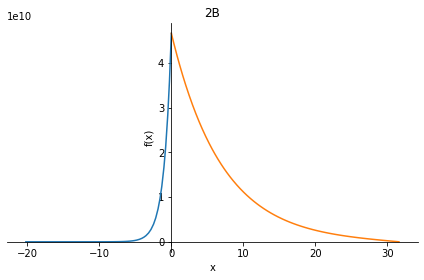

In [2]:
#2
x = symbols('x')

D1 = .1 #cm^-1
D2 = .8 #cm^-1
L1 = 1 #cm
L2 = 7 #cm
a = 20 #cm
b = 30 #cm
S = 10**10 

a_tilde = -a - 2*D1
b_tilde = b + 2*D2

C2 = S * (-D1/L1*np.cosh(a_tilde/L1)*sinh(b_tilde/L2)/sinh(a_tilde/L1) + D2/L2*np.cosh(b_tilde/L2))**(-1)
C1 = C2 * np.sinh(b_tilde/L2) / sinh(a_tilde/L1)

phi1 = C1*sinh((a_tilde - x)/L1)
phi2 = C2*sinh((b_tilde - x)/L2)

plot((phi1, (x, a_tilde, 0)), (phi2, (x, 0, b_tilde)), title='2B')

In [3]:
#4b

L, D, a, b, c, Sigma_p, S = symbols('L, D, a, b, c, Sigma_p, S')

A_matrix = Matrix([[-sinh(2*D/L),cosh(2*D/L),0,0],
                   [0,0,sinh((a+2*D)/L),cosh((a+2*D)/L)],
                   [sinh(c/L),cosh(c/L),-sinh(c/L),-cosh(c/L)],
                   [-D*cosh(c/L)/L-Sigma_p*b*sinh(c/L),-D*sinh(c/L)/L-Sigma_p*b*cosh(c/L),D*cosh(c/L)/L,D*sinh(c/L)/L]])

r_matrix = Matrix([-L**2*S/D, -L**2*S/D, 0, L**2*S*Sigma_p*b/D])

display(A_matrix,r_matrix)

Matrix([
[                        -sinh(2*D/L),                          cosh(2*D/L),                 0,                 0],
[                                   0,                                    0, sinh((2*D + a)/L), cosh((2*D + a)/L)],
[                           sinh(c/L),                            cosh(c/L),        -sinh(c/L),        -cosh(c/L)],
[-D*cosh(c/L)/L - Sigma_p*b*sinh(c/L), -D*sinh(c/L)/L - Sigma_p*b*cosh(c/L),     D*cosh(c/L)/L,     D*sinh(c/L)/L]])

Matrix([
[         -L**2*S/D],
[         -L**2*S/D],
[                 0],
[L**2*S*Sigma_p*b/D]])

In [4]:
C1, C2, C3, C4, x = symbols('C1, C2, C3, C4, x')

flux1 = C1*sinh(x/L) + C2*cosh(x/L) + S*L**2/D
flux2 = C3*sinh(x/L) + C4*cosh(x/L) + S*L**2/D

In [5]:
def soln_matrix(Sigma, cx):
    AA = A_matrix.subs([(D, 2), (L, 5), (S, 10**10), (a, 50), (b, .1), (c, cx), (Sigma_p, Sigma)])
    rr = r_matrix.subs([(D, 2), (L, 5), (S, 10**10), (b, .1), (Sigma_p, Sigma)])
    Const = (AA.inv() * rr).evalf()
    phi1 = (flux1.subs([(C1, Const[0]), (C2, Const[1]), (D, 2), (L, 5), (S, 10**10)])).evalf()
    phi2 = (flux2.subs([(C3, Const[2]), (C4, Const[3]), (D, 2), (L, 5), (S, 10**10)])).evalf()
    return Matrix([phi1, phi2])

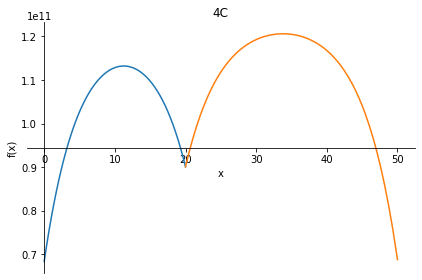

In [6]:
#4c
flux1_4c = soln_matrix(3, 20)[0]
flux2_4c = soln_matrix(3, 20)[1]

plot((flux1_4c, (x, 0, 20)), (flux2_4c, (x, 20, 50)), title='4C')

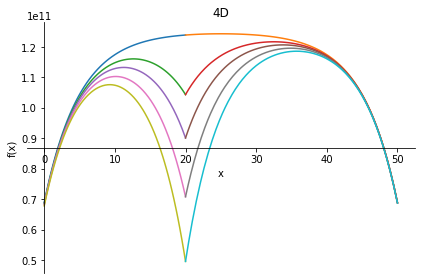

In [66]:
#4d
val1 = soln_matrix(0, 20)
f11 = val1[0]
f21 = val1[1]

val2 = soln_matrix(1.5, 20)
f12 = val2[0]
f22 = val2[1]

val3 = soln_matrix(3, 20)
f13 = val3[0]
f23 = val3[1]

val4 = soln_matrix(6, 20)
f14 = val4[0]
f24 = val4[1]

val5 = soln_matrix(12, 20)
f15 = val5[0]
f25 = val5[1]

plot((f11, (x, 0, 20)), (f21, (x, 20, 50)),
     (f12, (x, 0, 20)), (f22, (x, 20, 50)),
     (f13, (x, 0, 20)), (f23, (x, 20, 50)),
     (f14, (x, 0, 20)), (f24, (x, 20, 50)),
     (f15, (x, 0, 20)), (f25, (x, 20, 50)),
     title='4D')

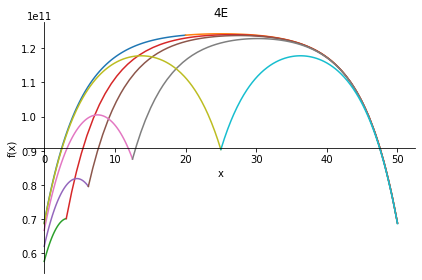

In [71]:
#4e
vala = soln_matrix(3, 50/16)
valb = soln_matrix(3, 50/8)
valc = soln_matrix(3, 50/4)
vald = soln_matrix(3, 50/2)

f1a = vala[0]
f1b = valb[0]
f1c = valc[0]
f1d = vald[0]

f2a = vala[1]
f2b = valb[1]
f2c = valc[1]
f2d = vald[1]

plot((f11, (x, 0, 20)), (f21, (x, 20, 50)),
     (f1a, (x, 0, 50/16)), (f2a, (x, 50/16, 50)),
     (f1b, (x, 0, 50/8)), (f2b, (x, 50/8, 50)),
     (f1c, (x, 0, 50/4)), (f2c, (x, 50/4, 50)),
     (f1d, (x, 0, 50/2)), (f2d, (x, 50/2, 50)),
     title='4E')